In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Carga

In [3]:
df1 = pd.read_csv('../data/raw_data/bq-results-20251016-165053-1760633522998.csv')
df2 = pd.read_csv('../data/raw_data/bq-results-20251016-165608-1760633792315.csv')

Convertir a date

In [4]:
df1["date_time"] = pd.to_datetime(df1["date_time"])
df2["date_time"] = pd.to_datetime(df2["date_time"])

Estandarizar variables

In [5]:
df1["variable"] = df1["variable"].where(
    df1["variable"] == "Temp",  # condición: deja igual si es "Temp"
    df1["variable"].str.upper()  # sino, convierte a mayúscula
)

df2["variable"] = df2["variable"].where(
    df2["variable"] == "Temp",
    df2["variable"].str.upper()
)


Estandarizar nombres de variables

In [7]:
df1["variable"] = df1["variable"].replace("PM2", "PM2.5")
df2["variable"] = df2["variable"].replace("PM2", "PM2.5")

## Variables compartidas

Las 15 variables más frecuentes son precisamente las compartidas

**Nota:** Tuvo que renombrarse la variable PM2 ya que hace referencia a PM2.5 en realidad

**Nota 2:** Ambos módulos de variables son relevantes, porque condicionan cómo se comportan, transforman o dispersan los contaminantes en la atmósfera.

In [8]:
merged = (
    pd.concat([
        df1["variable"].value_counts().rename("Count_1"),
        df2["variable"].value_counts().rename("Count_2")
    ], axis=1)
    .fillna(0)
    .astype(int)
    .sort_values(by=["Count_1", "Count_2"], ascending=False)
)

merged["Percentage_1 (%)"] = merged["Count_1"] * 100 / merged["Count_1"].sum()
merged["Percentage_2 (%)"] = merged["Count_2"] * 100 / merged["Count_2"].sum()

display(merged)

,Count_1,Count_2,Percentage_1 (%),Percentage_2 (%)
variable,,,,
SO2,2951558,2673430,11.459696,11.931606
RH,2922747,2208085,11.347835,9.854756
WDS,2605121,2010681,10.114623,8.973735
WDD,2204206,1826529,8.558033,8.151859
PM2.5,1958371,1545932,7.603556,6.899545
NO2,1921145,2784607,7.459023,12.427793
CO,1854110,1192384,7.198753,5.321649
Temp,1756651,760286,6.820360,3.393181
NO,1686297,2154950,6.547204,9.617613


## Distribución temporal de las variables

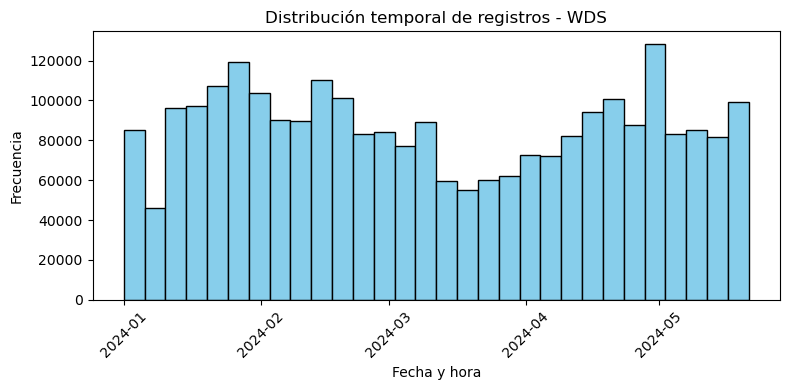

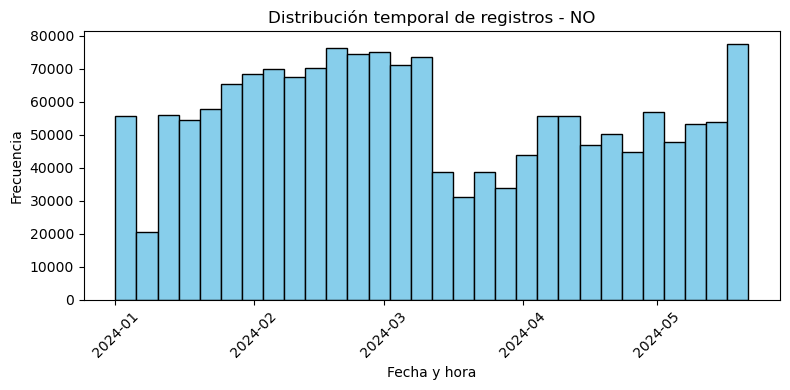

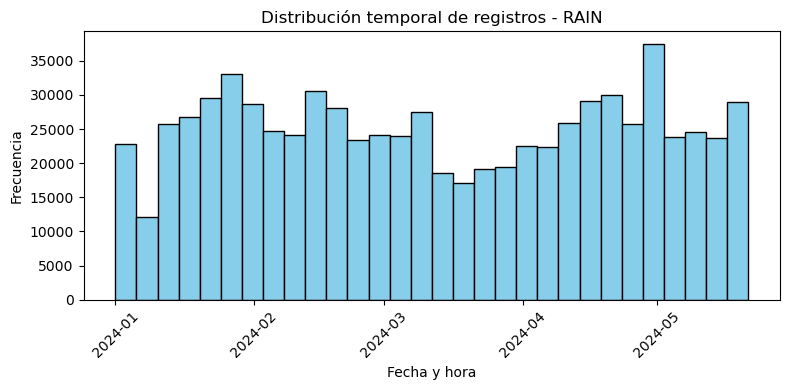

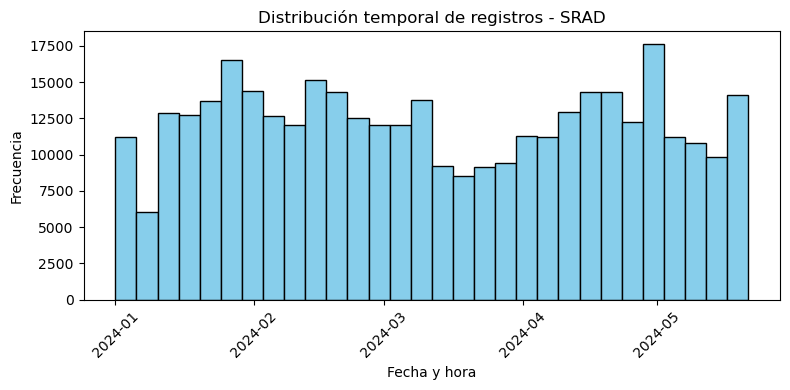

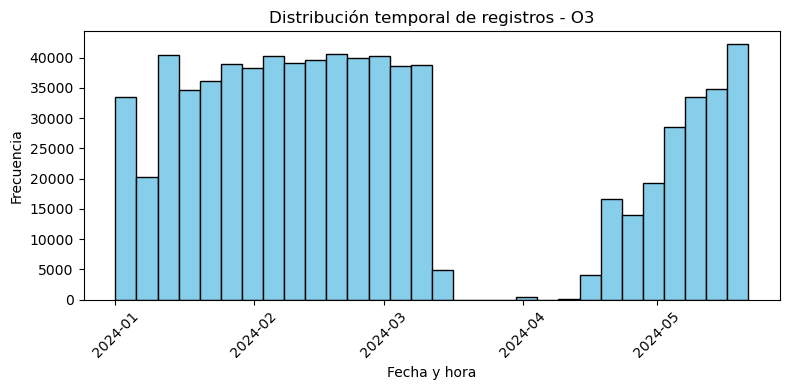

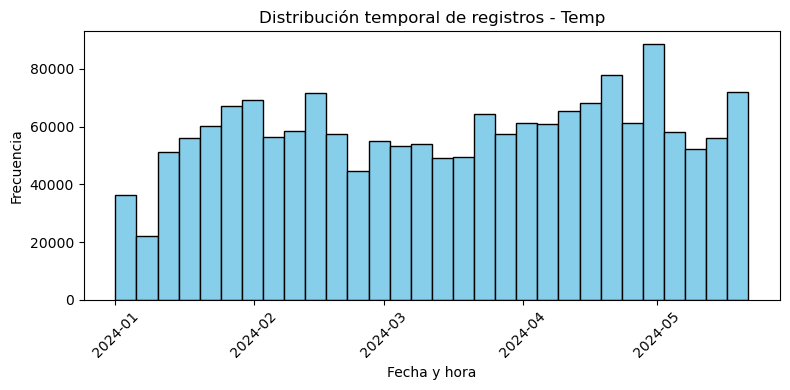

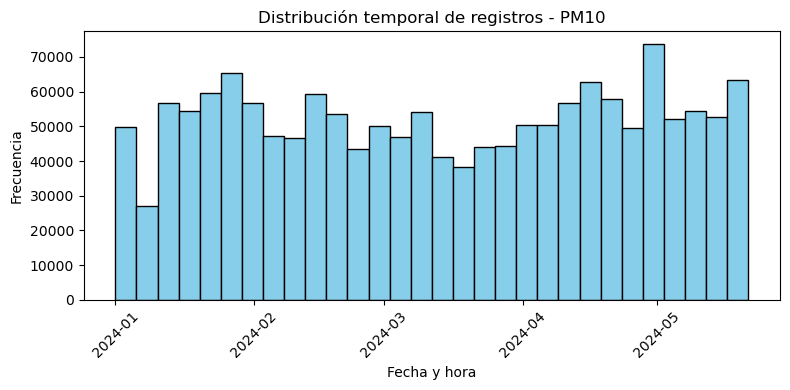

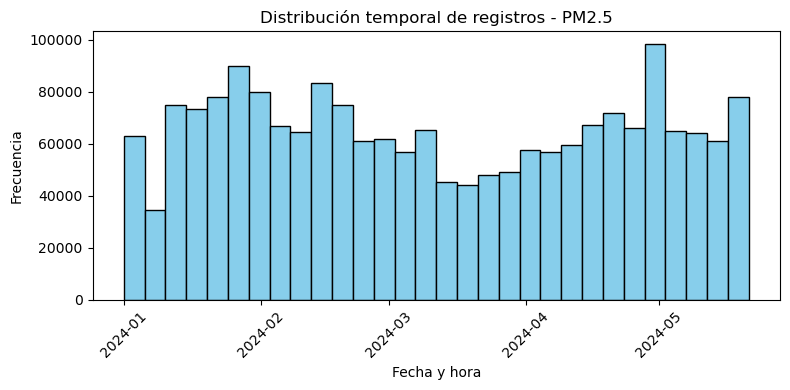

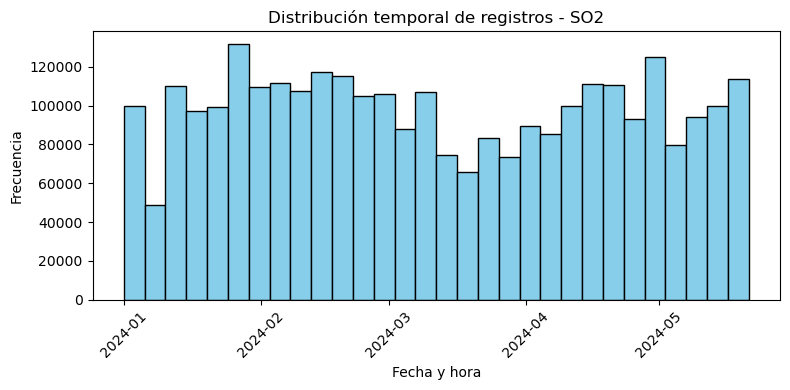

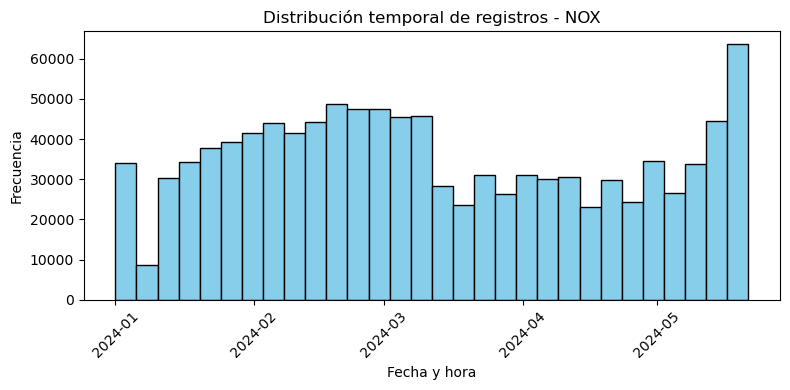

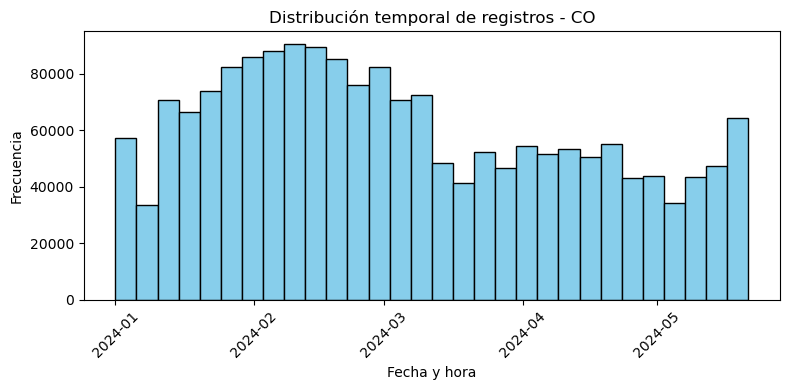

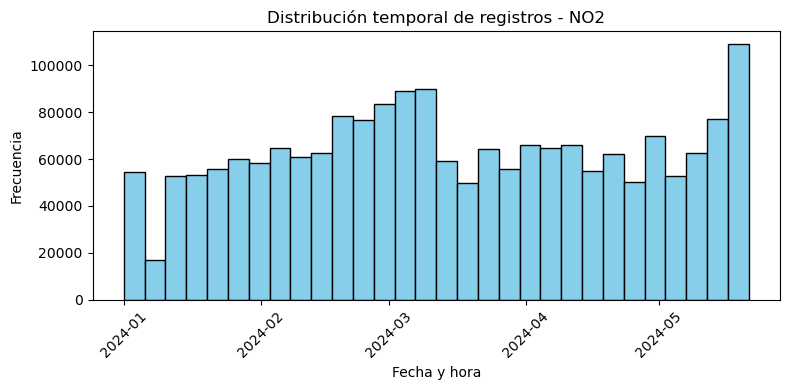

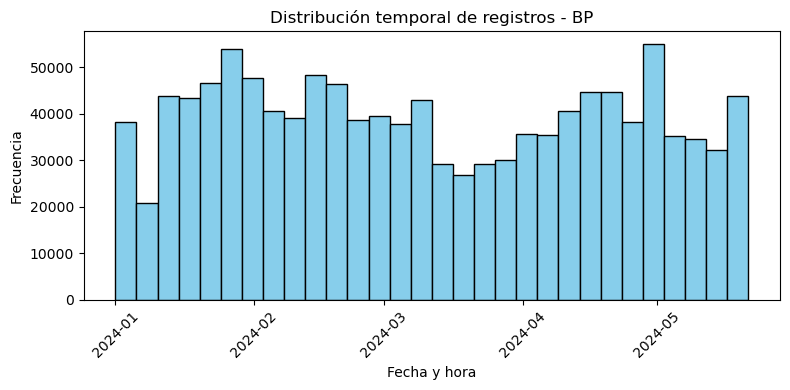

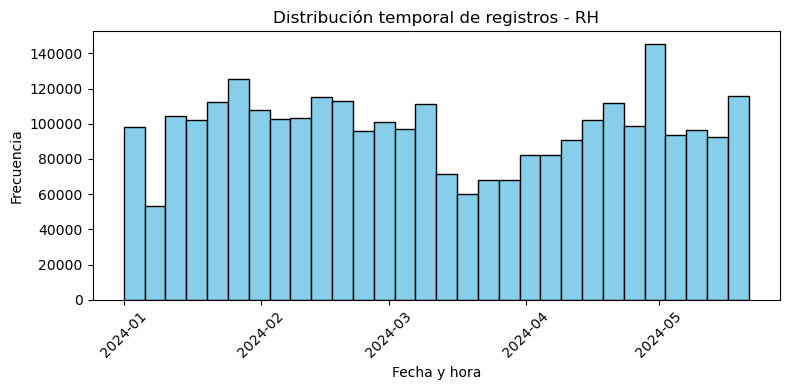

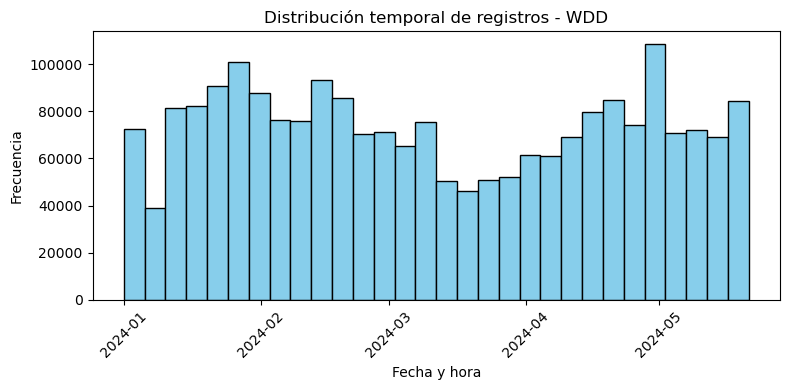

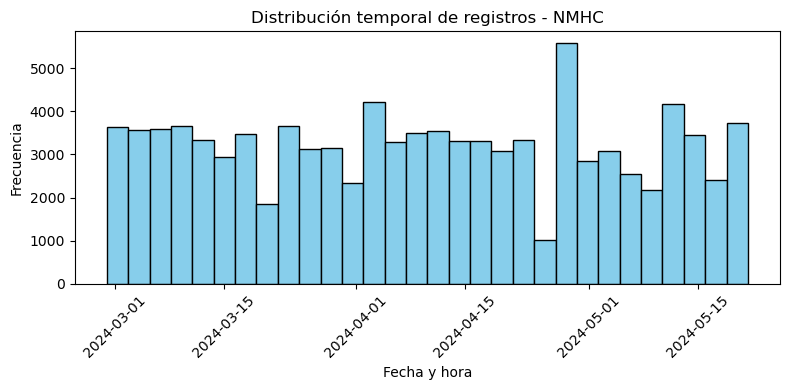

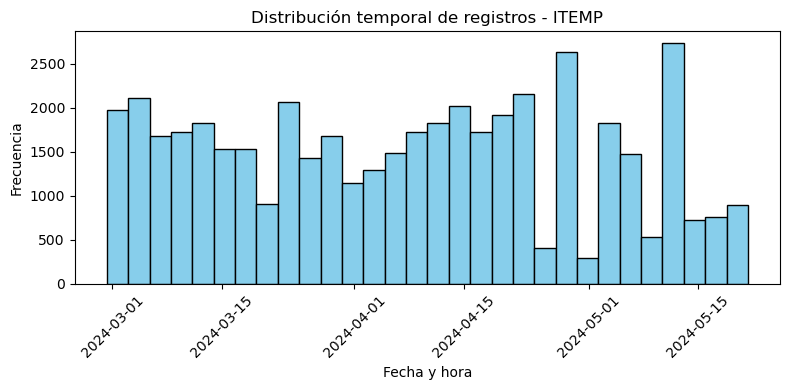

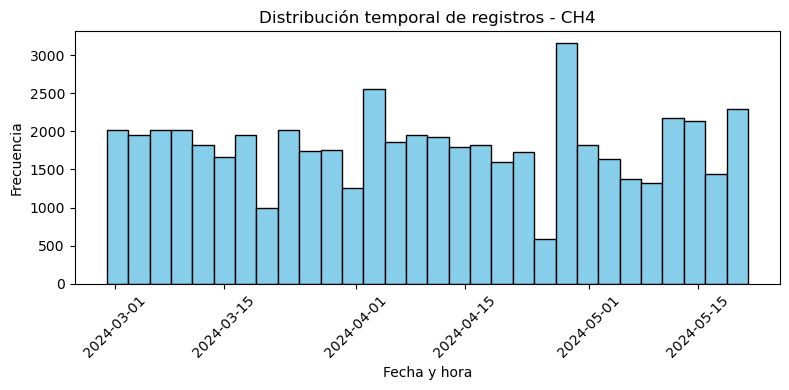

In [9]:
variables = df1["variable"].unique()

for var in variables:
    subset = df1[df1["variable"] == var]
    plt.figure(figsize=(8, 4))
    plt.hist(subset["date_time"], bins=30, color="skyblue", edgecolor="black")
    plt.title(f"Distribución temporal de registros - {var}")
    plt.xlabel("Fecha y hora")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
fechas_min_max = (
    df1.groupby("variable")["date_time"]
      .agg(["min", "max"])
      .reset_index()
      .rename(columns={"min": "fecha_min", "max": "fecha_max"})
      .sort_values(["fecha_min", "fecha_max"])
)

# Convertir a fecha sin hora ni zona horaria
fechas_min_max["fecha_min"] = fechas_min_max["fecha_min"].dt.tz_localize(None).dt.date
fechas_min_max["fecha_max"] = fechas_min_max["fecha_max"].dt.tz_localize(None).dt.date

display(fechas_min_max)

,variable,fecha_min,fecha_max
0,BP,2024-01-01,2024-05-21
2,CO,2024-01-01,2024-05-21
5,NO,2024-01-01,2024-05-21
6,NO2,2024-01-01,2024-05-21
7,NOX,2024-01-01,2024-05-21
8,O3,2024-01-01,2024-05-21
9,PM10,2024-01-01,2024-05-21
10,PM2.5,2024-01-01,2024-05-21
11,RAIN,2024-01-01,2024-05-21
12,RH,2024-01-01,2024-05-21


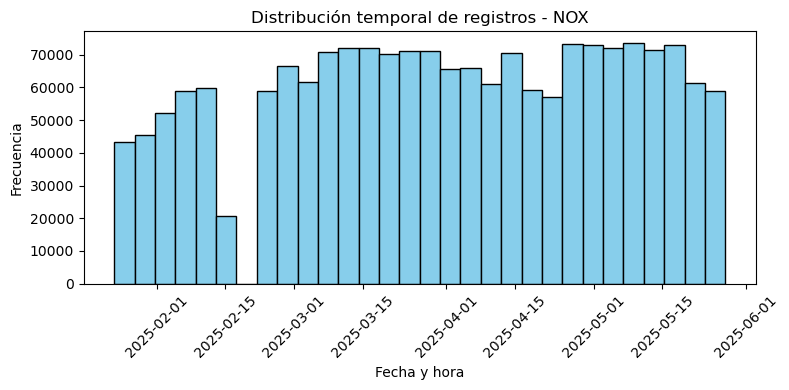

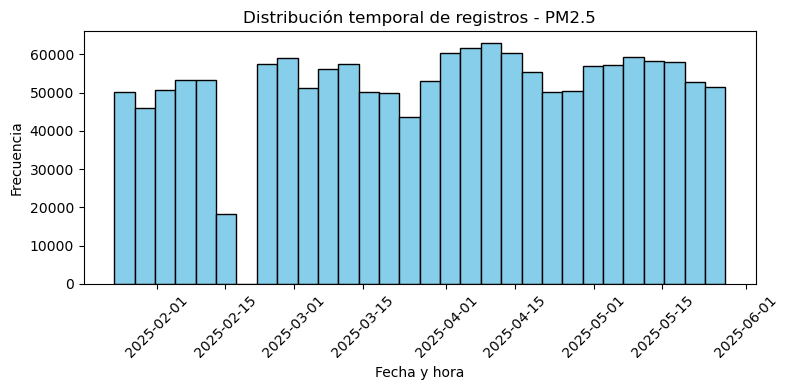

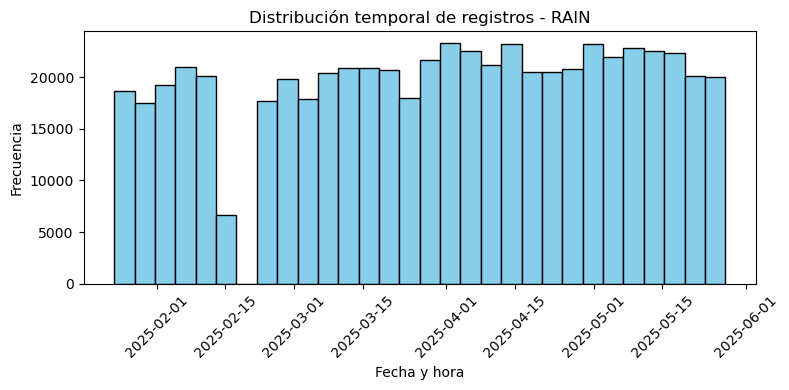

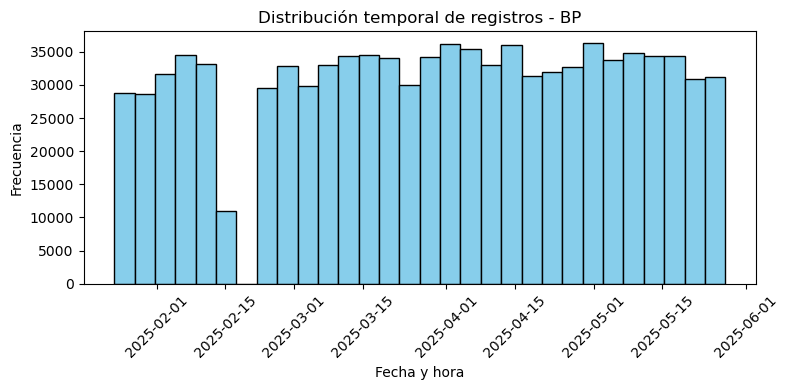

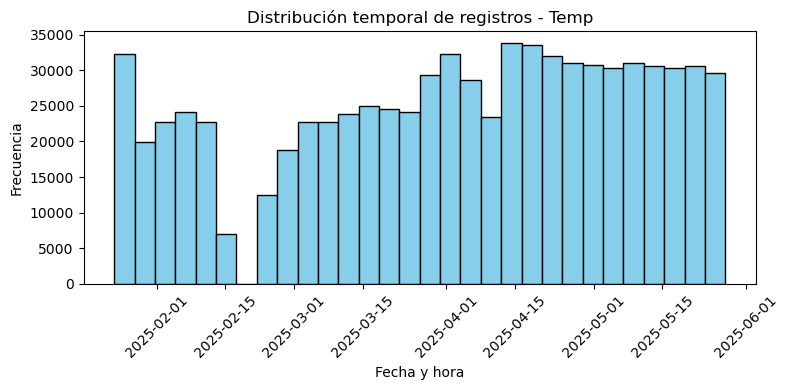

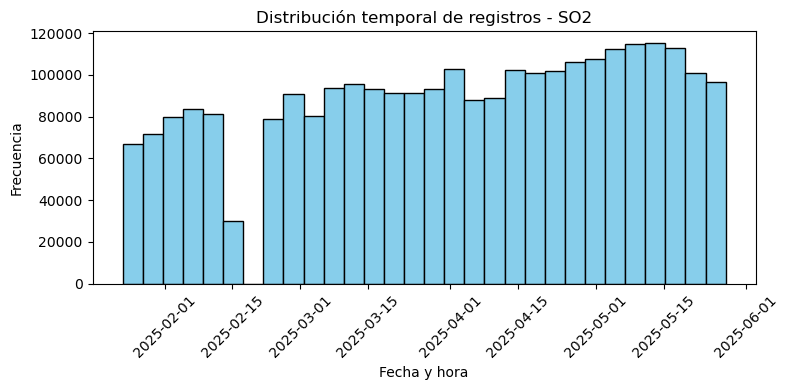

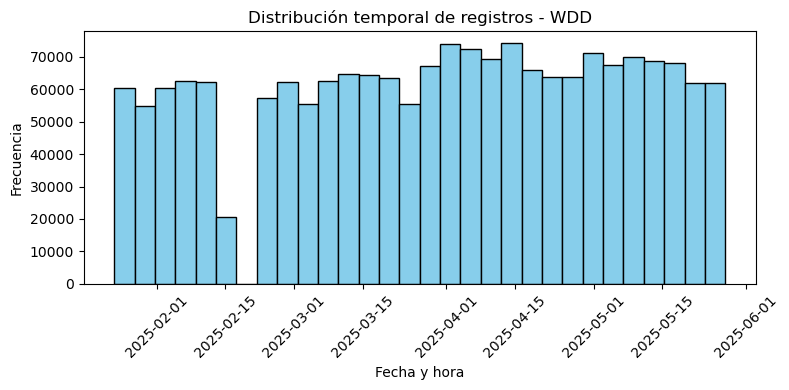

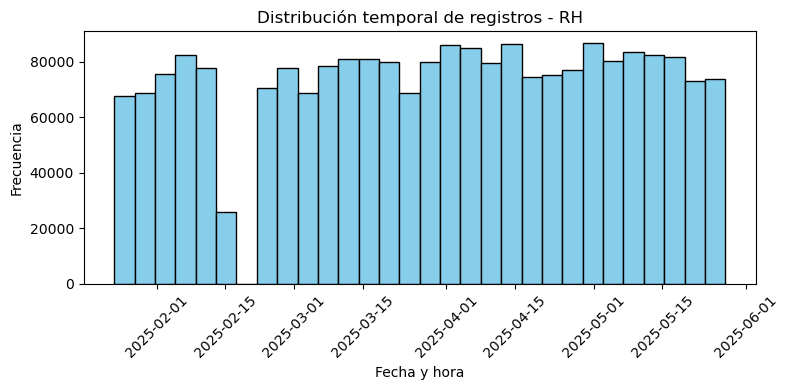

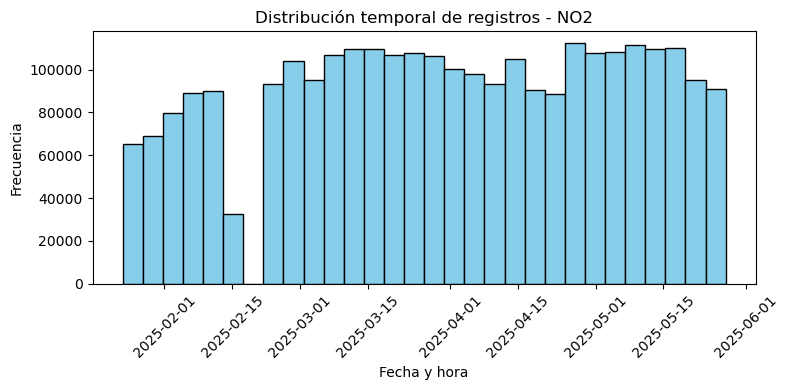

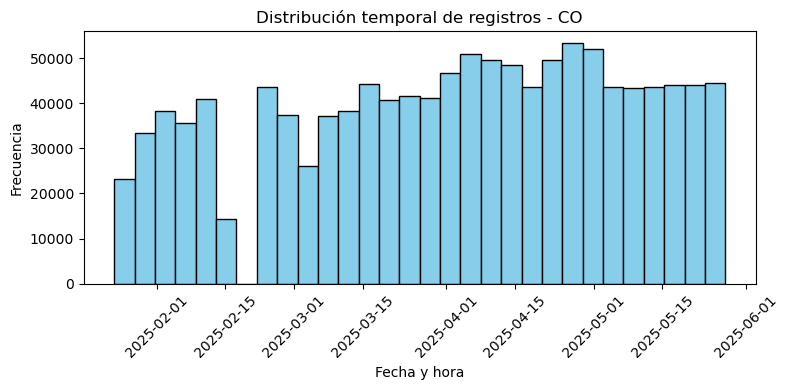

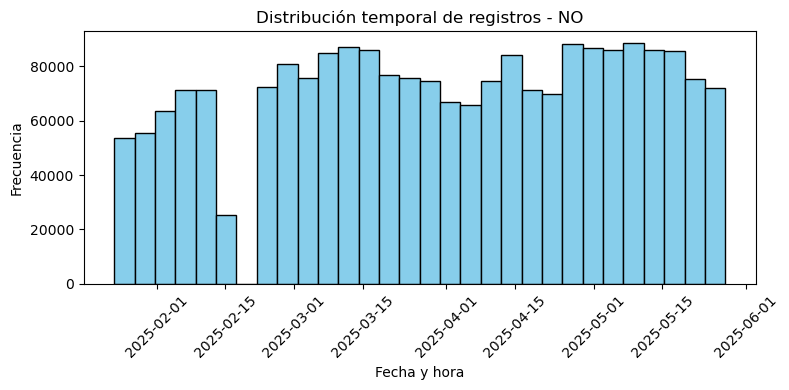

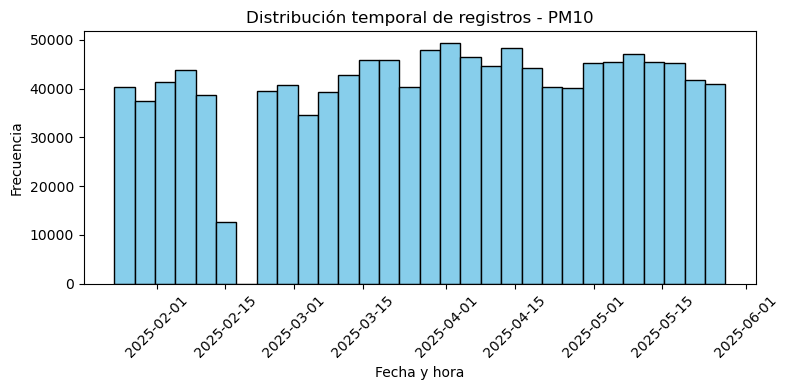

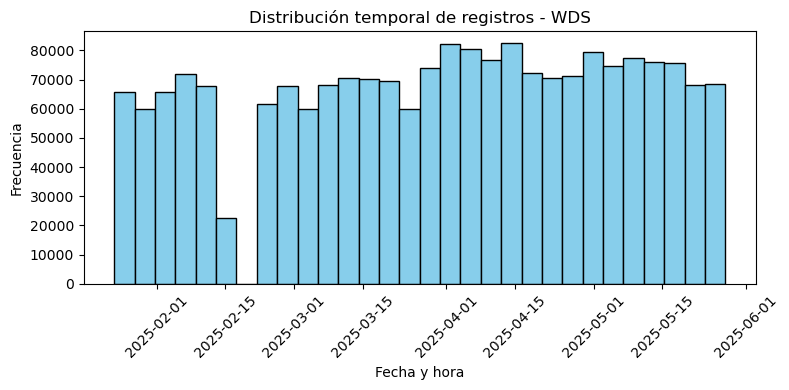

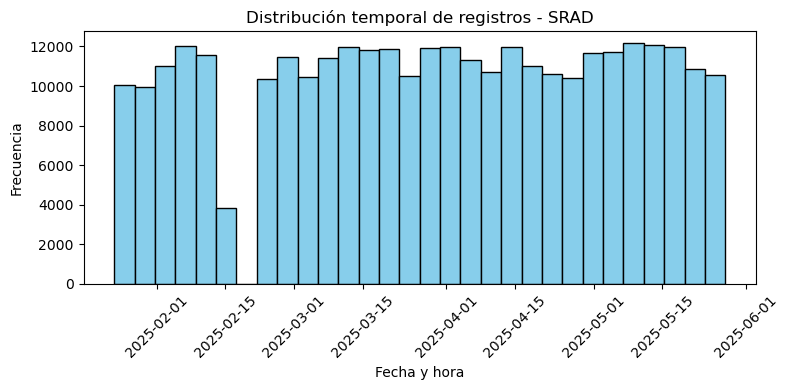

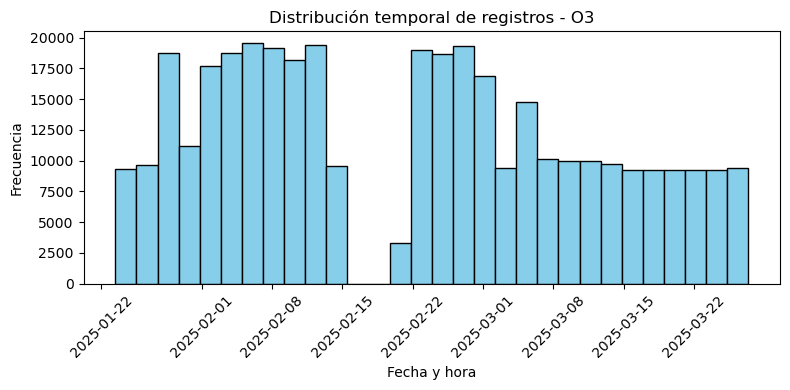

In [13]:
variables = df2["variable"].unique()

for var in variables:
    subset = df2[df2["variable"] == var]
    plt.figure(figsize=(8, 4))
    plt.hist(subset["date_time"], bins=30, color="skyblue", edgecolor="black")
    plt.title(f"Distribución temporal de registros - {var}")
    plt.xlabel("Fecha y hora")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [14]:
fechas_min_max = (
    df2.groupby("variable")["date_time"]
      .agg(["min", "max"])
      .reset_index()
      .rename(columns={"min": "fecha_min", "max": "fecha_max"})
      .sort_values(["fecha_min", "fecha_max"])
)

# Convertir a fecha sin hora ni zona horaria
fechas_min_max["fecha_min"] = fechas_min_max["fecha_min"].dt.tz_localize(None).dt.date
fechas_min_max["fecha_max"] = fechas_min_max["fecha_max"].dt.tz_localize(None).dt.date

display(fechas_min_max)

,variable,fecha_min,fecha_max
0,BP,2025-01-23,2025-05-27
6,PM10,2025-01-23,2025-05-27
7,PM2.5,2025-01-23,2025-05-27
8,RAIN,2025-01-23,2025-05-27
9,RH,2025-01-23,2025-05-27
10,SO2,2025-01-23,2025-05-27
11,SRAD,2025-01-23,2025-05-27
13,WDD,2025-01-23,2025-05-27
14,WDS,2025-01-23,2025-05-27
5,O3,2025-01-23,2025-03-27


**Hallazgos:**

- Las fechas del primer dataset van entre el 1 de enero y el 21 de mayo del 2024
- Las fechas del segundo dataset van entre el 23 de enero y el 27 de mayo del 2025
- En los primeros días del mes de enero del 2024 hubo una ligera pérdida de datos, o se hicieron menos mediciones
- Entre el 15 y 22 de mayo de 2025 hubo una pérdida de datos en todas las variables, probablemente por algún error técnico
- La variable **O3** merece ser **descartada**, ya que tiene un gap de un mes en 2024 y en 2025 no cubre los últimos meses
- Los datos directamente comparables van desde el 23 de enero hasta el 21 de mayo, perdiendo cerca del 19,6% de los datos

## Rangos de los valores de las variables

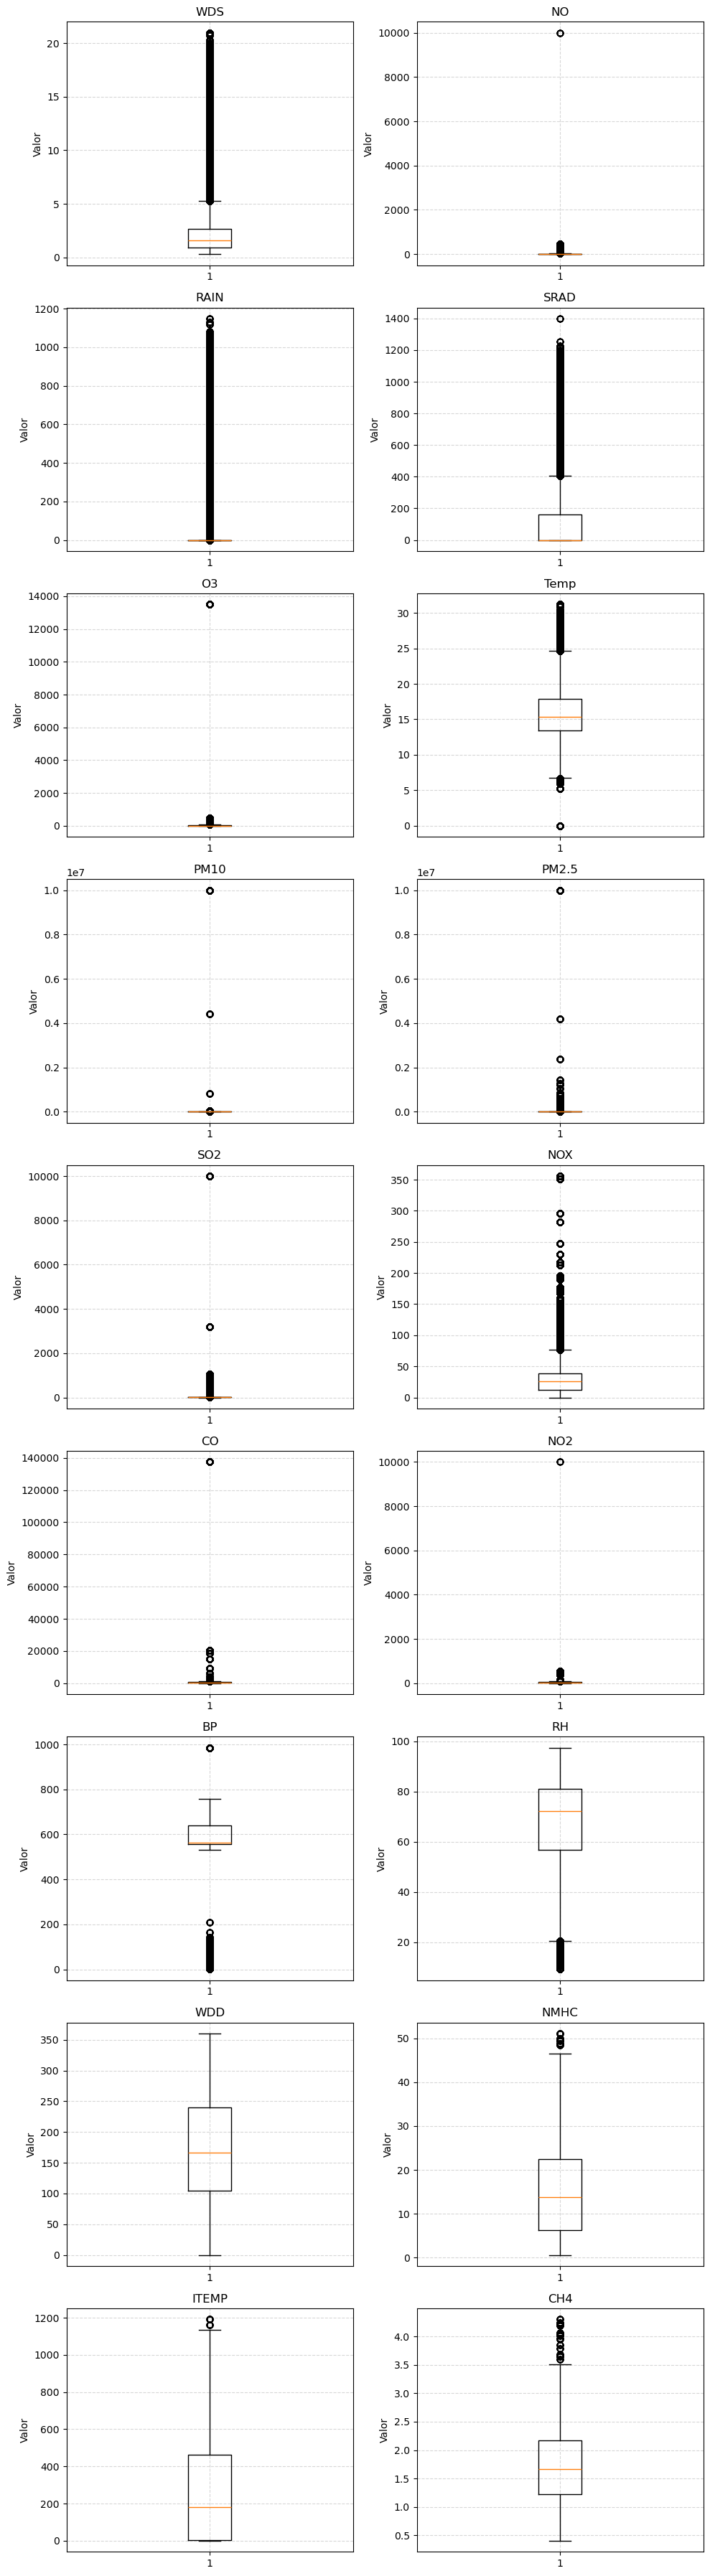

In [15]:
# Valores únicos
variables = df1["variable"].unique()
n_vars = len(variables)

# Calcula el número de filas y columnas del grid (ajústalo si prefieres otro layout)
n_cols = 2  # puedes cambiar a 2 o 4 según cuántos plots quieras por fila
n_rows = -(-n_vars // n_cols)  # división entera redondeada hacia arriba

# Crear figura y ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# Iterar sobre cada variable
for i, var in enumerate(variables):
    row, col = divmod(i, n_cols)
    ax = axes[row][col]
    subset = df1[df1["variable"] == var]
    
    ax.boxplot(subset["value"], showfliers=True)
    ax.set_title(var)
    ax.set_ylabel("Valor")
    ax.grid(True, linestyle="--", alpha=0.5)

# Eliminar ejes vacíos (si sobran)
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [16]:
df1.groupby("variable")["value"].describe()

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
BP,1183730.0,551.441900,189.925148,1.000000,557.789200,564.521800,640.376700,9.850000e+02
CH4,54364.0,1.725736,0.663114,0.404948,1.230160,1.669997,2.171797,4.299376e+00
CO,1854110.0,578.349517,1417.569077,0.360373,311.634094,462.105591,700.526672,1.374603e+05
ITEMP,46050.0,277.451925,301.818949,0.003915,1.589930,179.016600,462.494000,1.190972e+03
NMHC,96896.0,15.679713,10.017954,0.633818,6.288031,13.865760,22.514460,5.104833e+01
NO,1686297.0,9.213367,37.868010,0.000000,0.000000,2.461292,9.497753,9.999000e+03
NO2,1921145.0,34.340672,42.336254,0.000000,13.994698,32.067047,50.865410,9.999000e+03
NOX,1071946.0,28.335849,24.895980,0.000000,12.584940,25.643840,38.444690,3.556689e+02
O3,758080.0,22.314521,224.375790,0.068486,2.655320,9.399550,31.276739,1.349538e+04


**Hallazgos:**

- RAIN no cumple el rango de referencia de 0 a 10, dado que tiene valores cercanos a 1200 mm que no tienen sentido
- O3 y CO tienen un outlier que se sale de los valores de referencia
- PM10, PM2.5 y SO2 tienen varios valores que se salen del rango de referencia
- NO, NO2 y SO2 tienen el valor típico de flag 9999
- PM10, PM2.5 tienen el valor típico de flag 999999

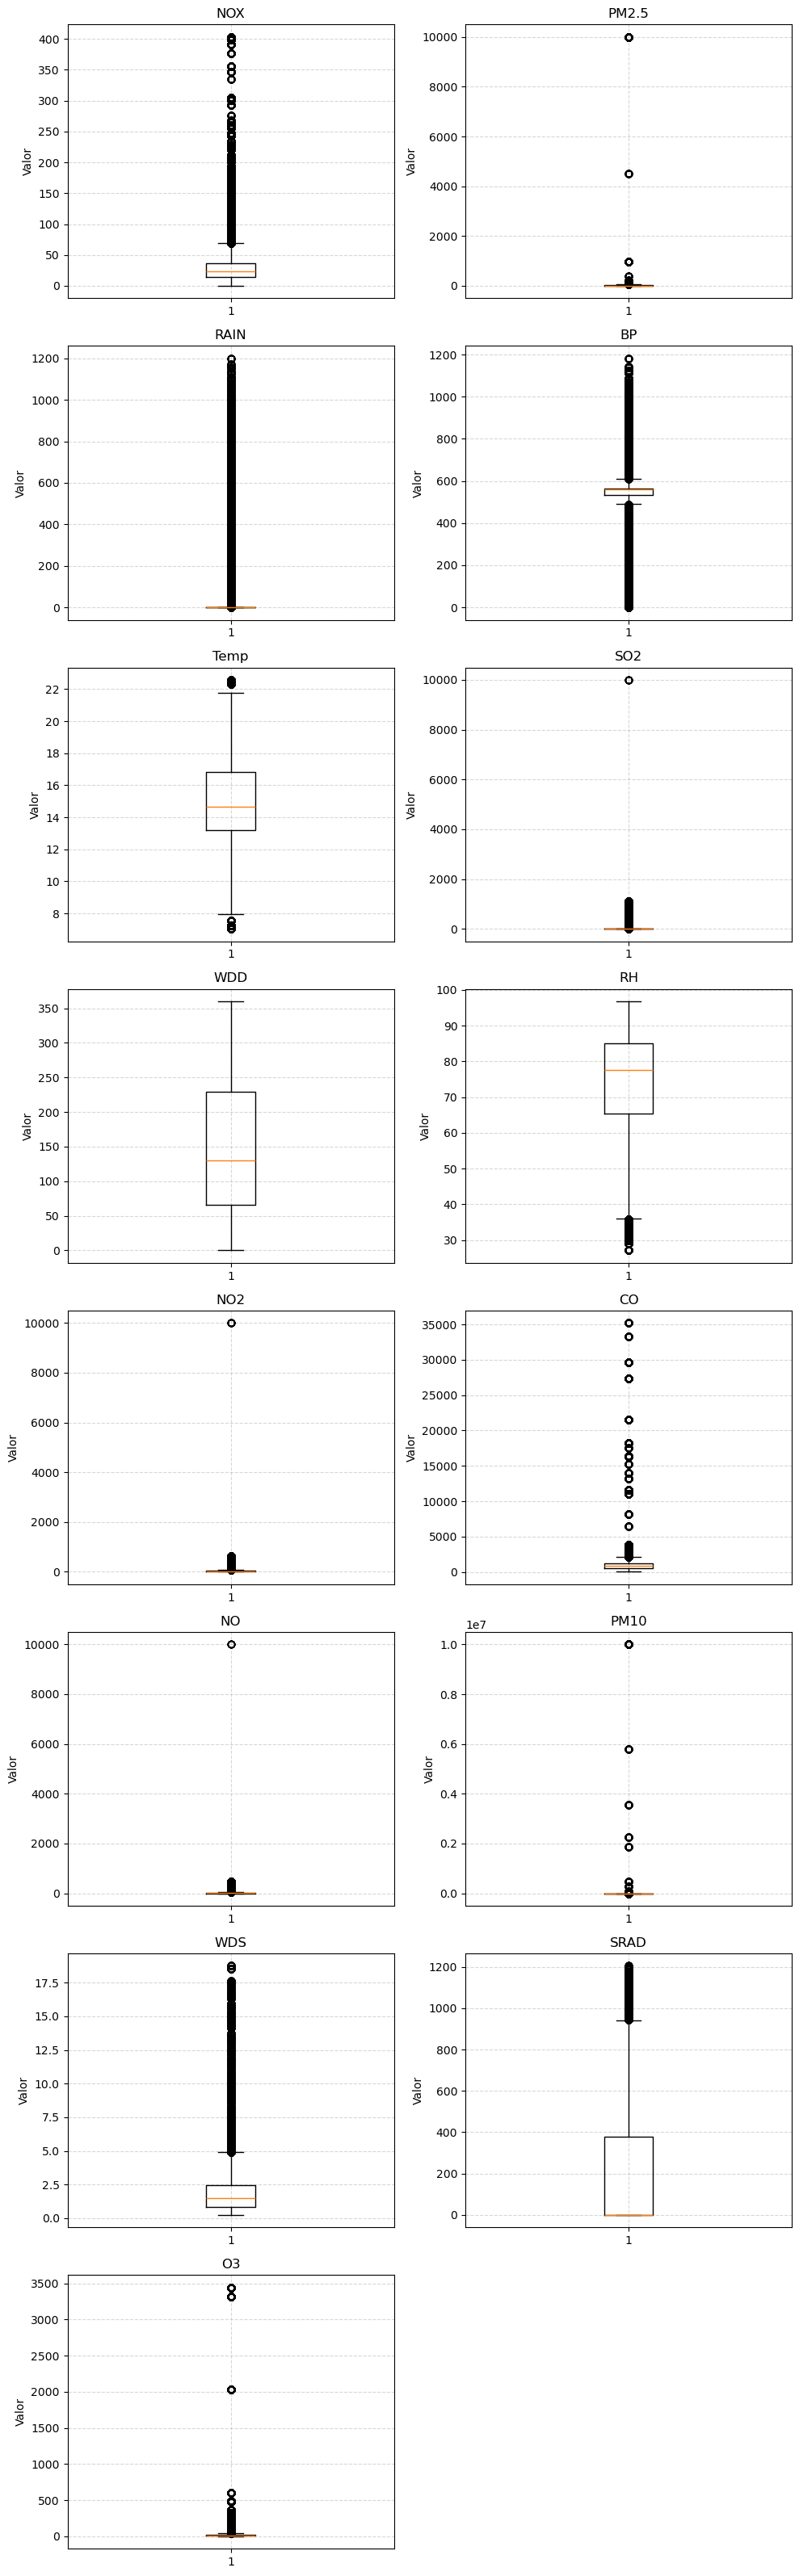

In [17]:
# Valores únicos
variables = df2["variable"].unique()
n_vars = len(variables)

# Calcula el número de filas y columnas del grid (ajústalo si prefieres otro layout)
n_cols = 2  # puedes cambiar a 2 o 4 según cuántos plots quieras por fila
n_rows = -(-n_vars // n_cols)  # división entera redondeada hacia arriba

# Crear figura y ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

# Iterar sobre cada variable
for i, var in enumerate(variables):
    row, col = divmod(i, n_cols)
    ax = axes[row][col]
    subset = df2[df2["variable"] == var]
    
    ax.boxplot(subset["value"], showfliers=True)
    ax.set_title(var)
    ax.set_ylabel("Valor")
    ax.grid(True, linestyle="--", alpha=0.5)

# Eliminar ejes vacíos (si sobran)
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [18]:
df2.groupby("variable")["value"].describe()

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
BP,932080.0,486.648287,234.054318,0.000000,533.049900,558.460300,564.244900,1.181857e+03
CO,1192384.0,909.926137,957.262108,10.104415,539.722046,809.609863,1158.407471,3.520718e+04
NO,2154950.0,17.195915,31.645327,0.000000,3.549774,9.106091,23.645702,9.999000e+03
NO2,2784607.0,34.692884,38.666234,0.000000,17.266075,28.786108,47.294765,9.999000e+03
NOX,1829677.0,29.476307,25.127653,0.000000,14.575510,23.801530,36.549630,4.030392e+02
O3,367854.0,31.225555,132.227852,0.018030,5.828174,11.230844,22.618820,3.444816e+03
PM10,1214986.0,6607.192835,246566.038591,0.000000,11.883720,21.435930,35.486810,9.999999e+06
PM2.5,1545932.0,1227.075665,3248.136372,0.000000,6.809456,13.191420,25.000000,9.999000e+03
RAIN,585570.0,26.493832,123.689657,0.000000,0.000000,0.000000,0.000000,1.199757e+03


**Hallazgos:**

- Se mantienen las anomalías anteriores, con algunos cambios
- CO ya no es un verdadero outlier, ya que solo se pasa ligeramente del rango de referencia
- El flag de PM2.5 ahora se codifica con 9999